# Medical Cost Personal Insurance 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Observation
> It has 1338 rowa and 7 columns.

In [60]:
df.shape

(1337, 7)

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Observation
> Among 7 columns, one column 'charges' are our target variable, remaining 6 columns are independent variables. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations
> it has 3 types of datatype  present which are  integar, float and object.
> It has 2 columns holding integar value, 2 columns contain float values and rest 3 columns get object values.

### Missing Data

In [7]:
#Check for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

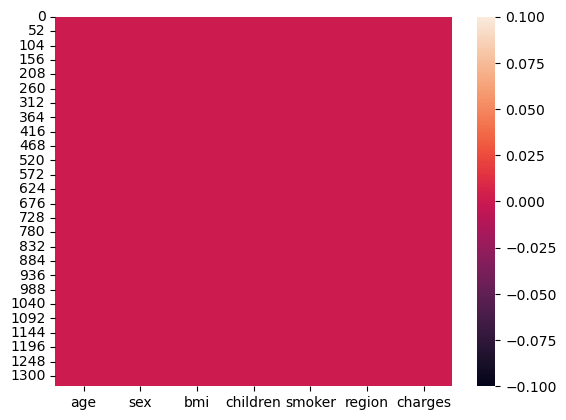

In [8]:
#lets visualise it
sns.heatmap(df.isnull())

Observations
> Clearly visualize there are no missing values in the dataset.

### Duplicate Values

In [9]:
#Check duplicate values
df.duplicated().sum()

1

In [10]:
#Dropping duplicated Values
df.drop_duplicates(inplace=True)

#check Duplicated Values again
df.duplicated().sum()

0

In [11]:
#check dimension of data after removing duplicate values
df.shape

(1337, 7)

Observation
> 1 duplicate values found in the dataset,we droped the duplicated row.
> it has 1337 rows and 7 columns.

In [12]:
df.nunique().to_frame("No. of Unique Values in Each column")

,No. of Unique Values in Each column
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Observations
> It has  the unique values in each column in the dataframe.

In [13]:
#checking unique values in target Column
df["charges"].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

Observation
> We can clearly visialize that our target variable has 1337 unique values which equal to the number of rows in our dataframe.

## Column Types:

In [14]:
num_colmn = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns in our dataset :\n", num_colmn,"\n")

cat_column = df.select_dtypes(include=['object']).columns
print("categorical columns in our dataset :\n", cat_column)

Numerical columns in our dataset :
 Index(['age', 'bmi', 'children', 'charges'], dtype='object') 

categorical columns in our dataset :
 Index(['sex', 'smoker', 'region'], dtype='object')


Observations
> It has  numerical and categorical columns in our set.

In [15]:
#description of data in categorical columns:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observation
- 'Age' column has't appear to be significantly skewed.Approximately symmetric or very close to being normally distributed.
- mean of 'BMI' (30.66) has somewhat closer to the 75th percentile (34.70) than the 25th percentile (26.29). It suggests a slightly right-skewed distribution, where the tail of the distribution extends more to the right.
- mean number of 'children'(1.10) has closer to the 75th percentile (2.00) than the 25th percentile (0.00). Its also indicates a right-skewed distribution, where more individuals have a higher number of dependents.


In [16]:
#description of data in categorical columns:
df.describe(include=['object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


Observations
> Unique Values in Sex, Smoker & Region are 2,2 and 4 Respectively.
> Based on the results from describe, we also see these variables has at the top and more frequent in the dataset: male, non-smoker, southeast region.

#### Lets visualize the distribution of data in thecolumns

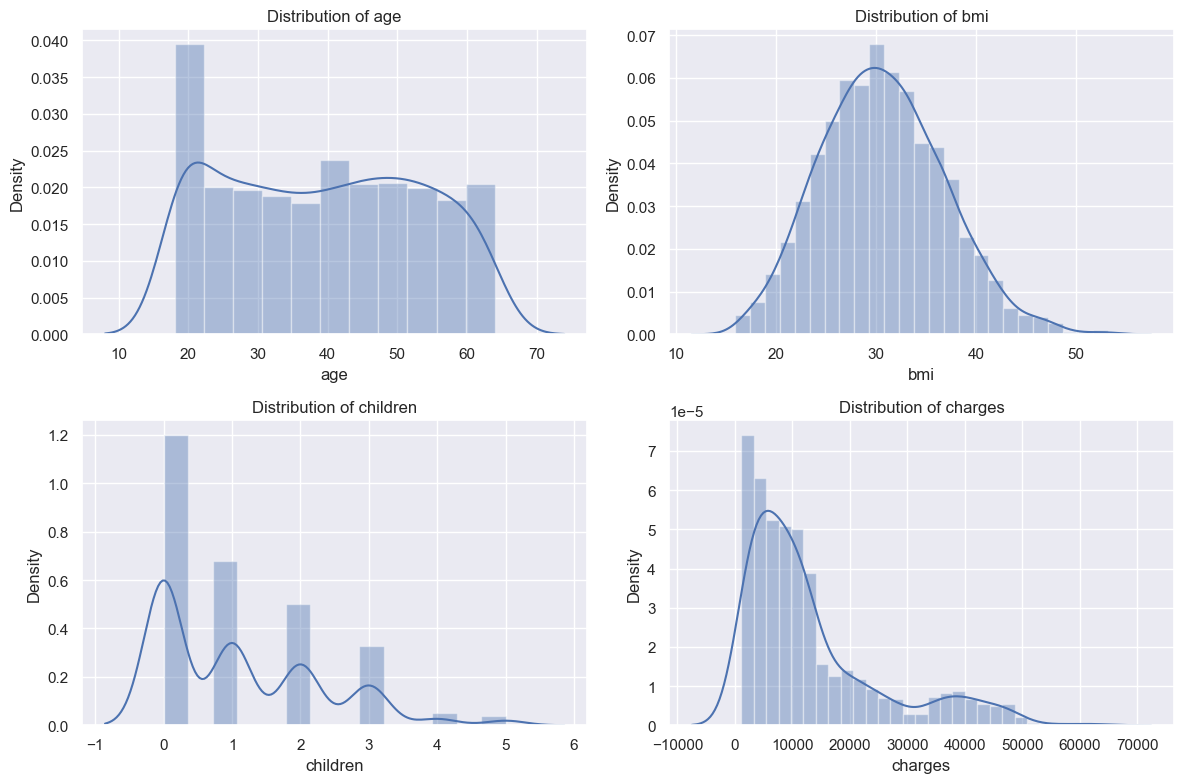

In [17]:
# Numerical Columns
plt.figure(figsize=(12, 8))
p=1
for column in num_colmn:
    sns.set()
    # Adjust the subplot size within the figure
    plt.subplot(2,2,p)
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    p += 1
plt.tight_layout()
plt.show()

Observations
- Age: As we know we have 47 unique values in our dataset and Maximum people are in age between 20-25.
- BMI : Normal BMi is ideally 18.5 to 24.9 however, in our dataset we can see maximum occurances in between 24.9 to 35 approx.
- Children: In out dataset Maximum number of people don't have children. We can visualize that data is showing skewness. However, we wont remove it at is belongs to categorical data
- Charges : It is our target column, it contains 1337 unique values, and maximum people are getting 1000-17000.

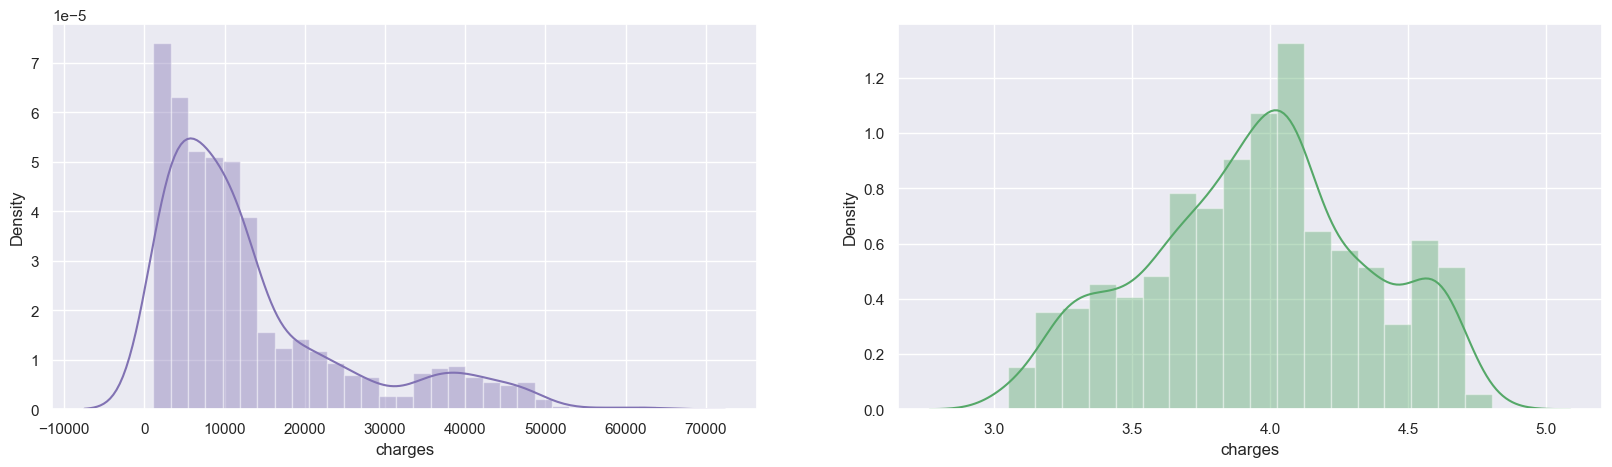

In [18]:
#Handling Distribution of Charges

# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'm')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'g')
plt.show()

Observations  
> The distribution of charges exhibits right-skewness, prompting us to apply the natural logarithm transformation to approximate a more normal distribution.

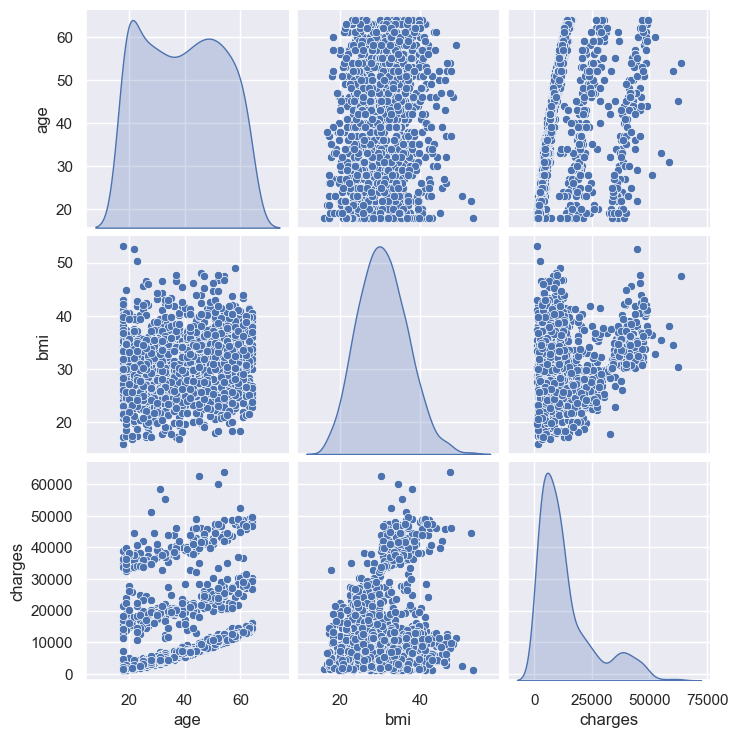

In [19]:
# Pairplot for Age, BMI, Charges
numerical_df = df[num_colmn]

# Remove the 'children' column from numerical_df
numerical_df.drop('children', axis=1, inplace=True)

sns.pairplot(numerical_df, diag_kind = 'kde')
plt.show()

Observations 
> The pairplot indicates the presence of a linear relationship between age and BMI with respect to charges.

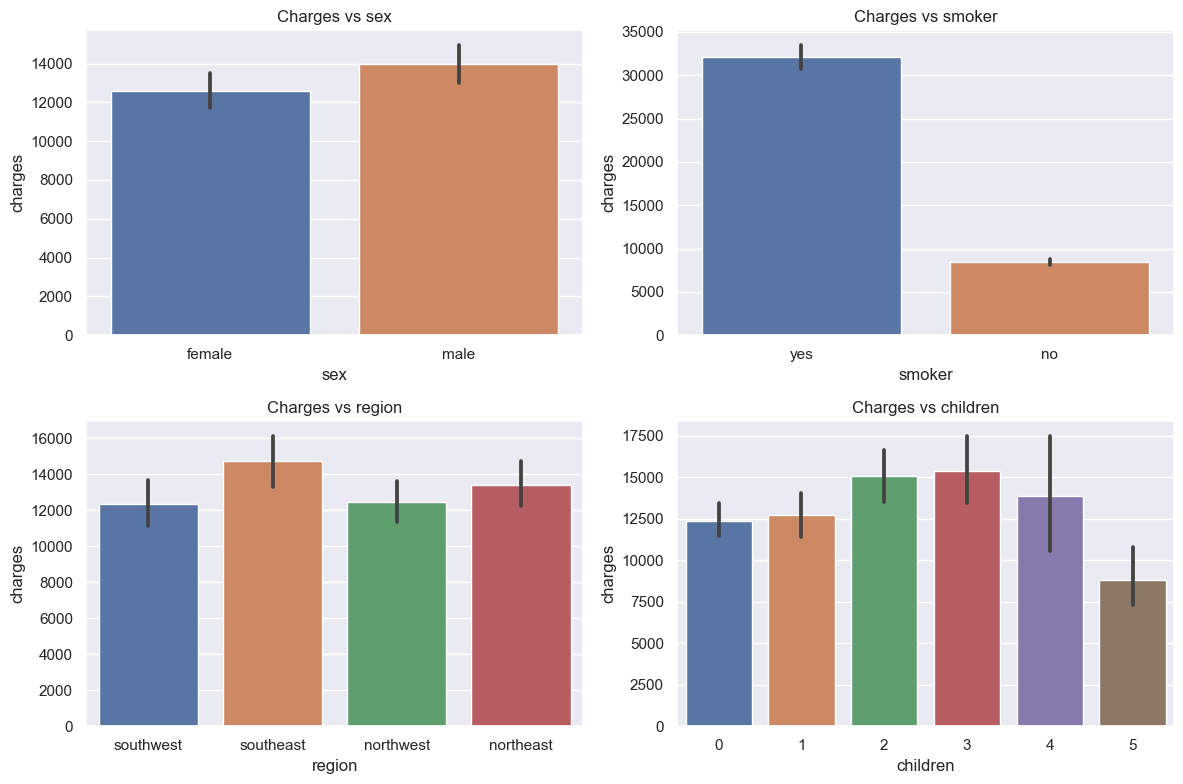

In [20]:
#Adding children variable in categorical column
cat_column = cat_column.append(pd.Index(['children']))

#Create a DataFrame containing the selected categorical columns
cat_df = df[cat_column]

p = 1
plt.figure(figsize=(12, 8))

for column in cat_df:
    sns.set()
    if p <= 4:
        plt.subplot(2, 2, p)
        sns.barplot(x=column, y='charges', data=df)
        plt.title(f'Charges vs {column}')
        p += 1

plt.tight_layout()
plt.show()

Observations
- Sex: The data has bit baised towards male than women in the dataset.
- Smoker: Ration of smoker got higher than non smoker in our dataset.And we can clearly visualise smokers medical charges is higher than non smokers.
- Region: We can notice southeast region are paying higher than other 3 regions.
- Children: Here we can see people with 2 and 3 children than the people with 0,1,4 and 5 respectively.

## Bivariate Analysis

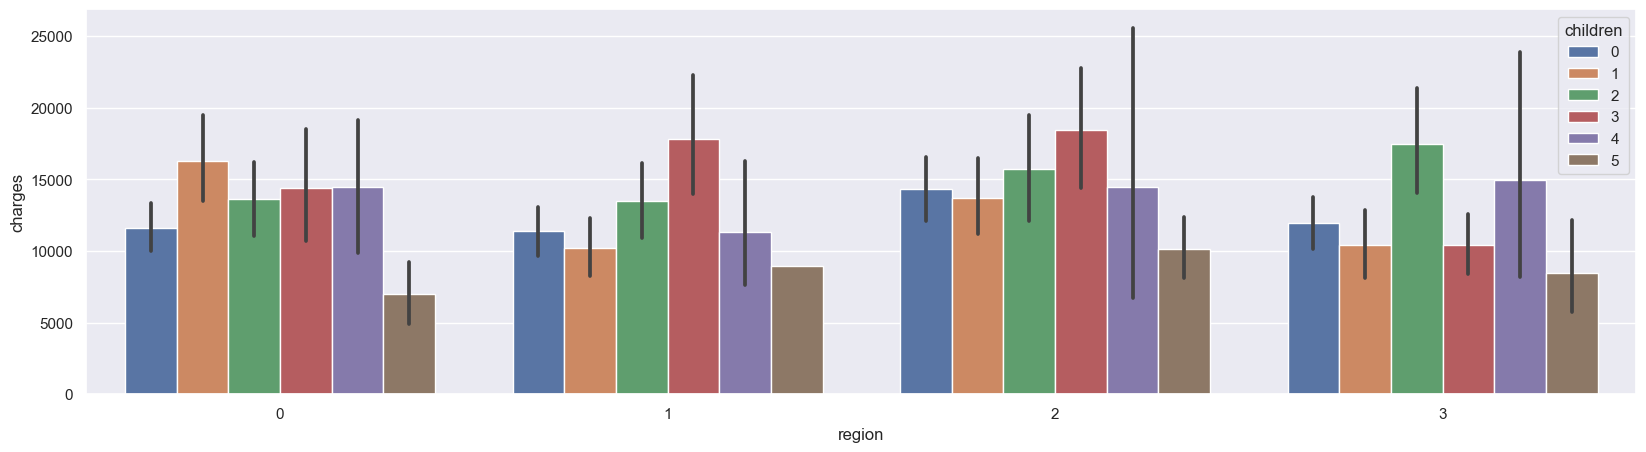

In [62]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

Observations
> It appears that there is no statistically significant difference in how the number of children in a specific region impacts medical charges.

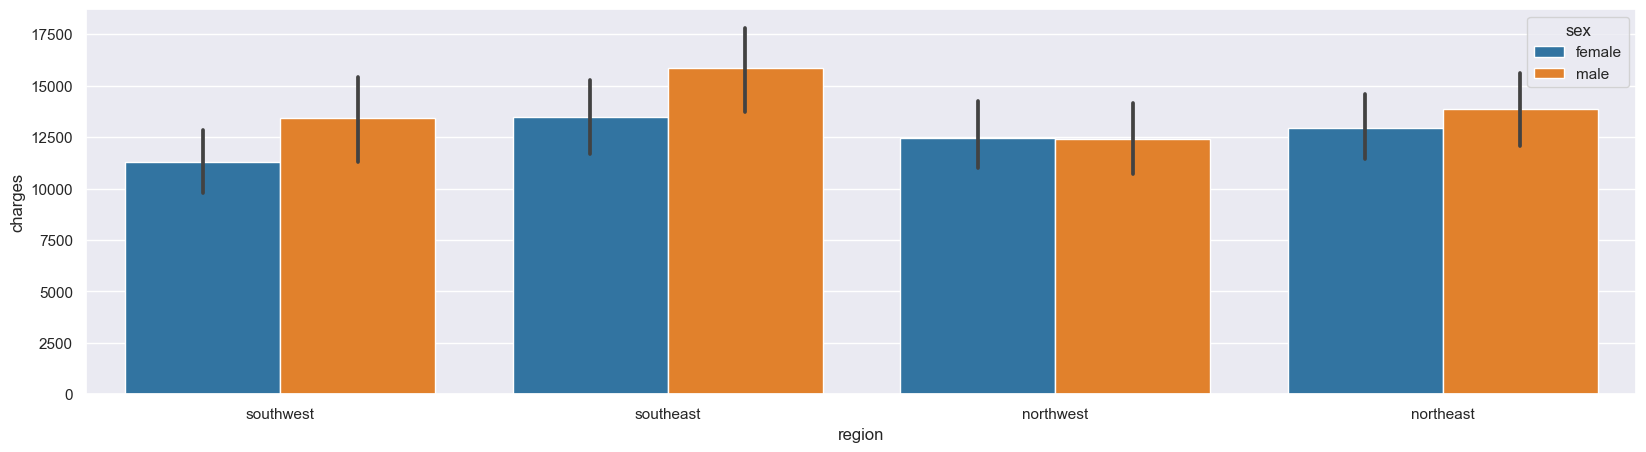

In [22]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'tab10')
plt.show()

Observations
> Similar to the previous graph, it doesn't appear to be a statistically significant difference in how gender within a specific region affects medical charges.

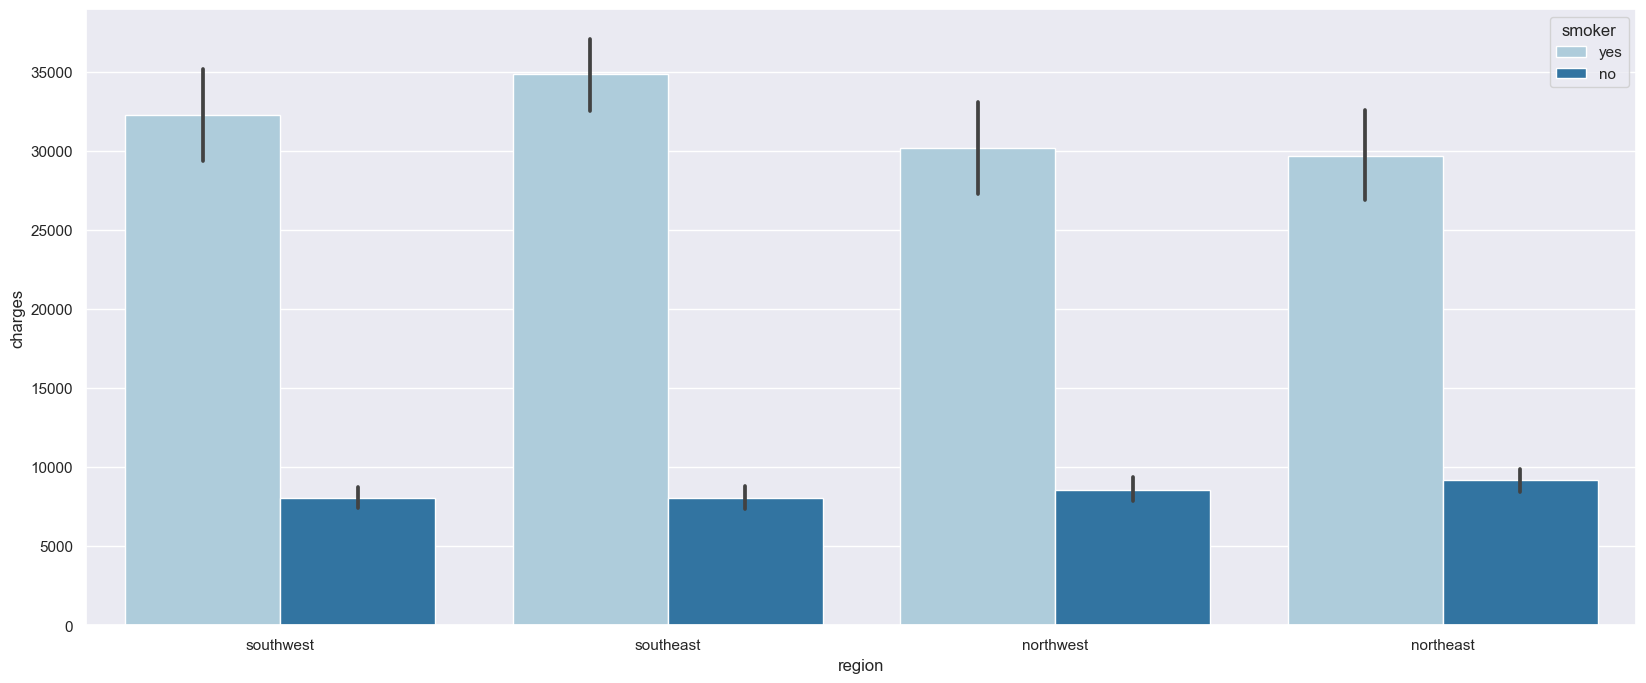

In [23]:
plt.subplots(1, 1, figsize = (20, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Paired')
plt.show()

Observations 
>In contrast to the other factors, it appears that  it has statistically significant difference in how smoking behavior within a region impacts medical charges.
>From these bar charts, it has  evident that smoking behavior by region significantly affects medical charges.

Text(0.5, 1.0, 'Number of children vs Medical Charges')

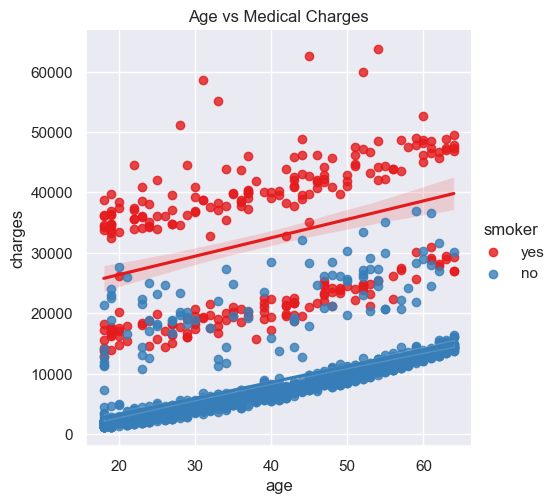

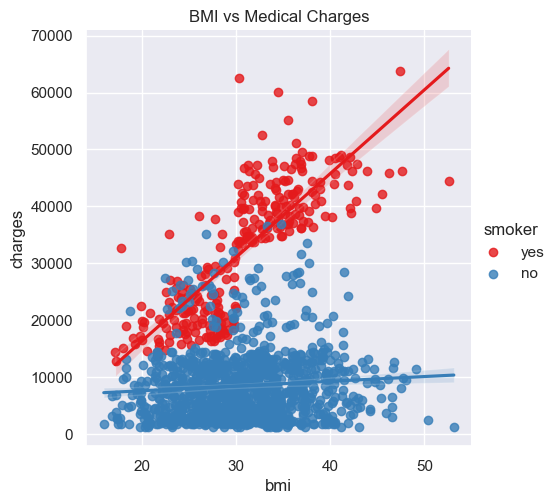

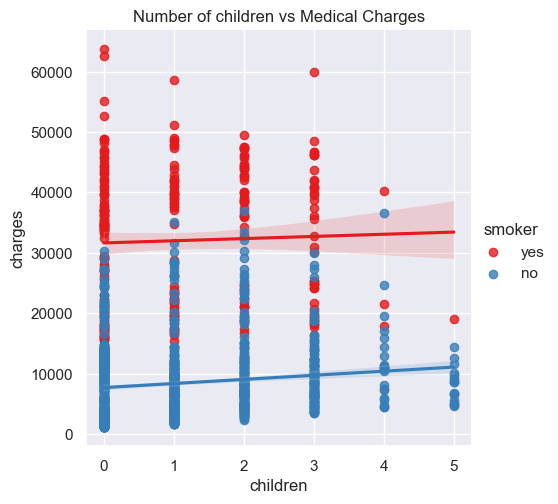

In [24]:
#Charges by age, bmi, and children based on smoking behavior

ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Observations
> Its clear that smoking has a significant impact on medical costs. When combined with other factors such as age, BMI, and the number of children, the effect of smoking on medical costs becomes even more pronounced and leads to higher medical expenses. In other words, smoking, when considered alongside these factors, contributes to increased medical costs.

In [ ]:
## Encoding the categorical features

In [25]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region)
df.region = label.transform(df.region)

label.fit(df.sex)
df.sex = label.transform(df.sex)

label.fit(df.smoker)
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Observations
> converted all the categorical columns into numerical.

#### Multivariate Analysis

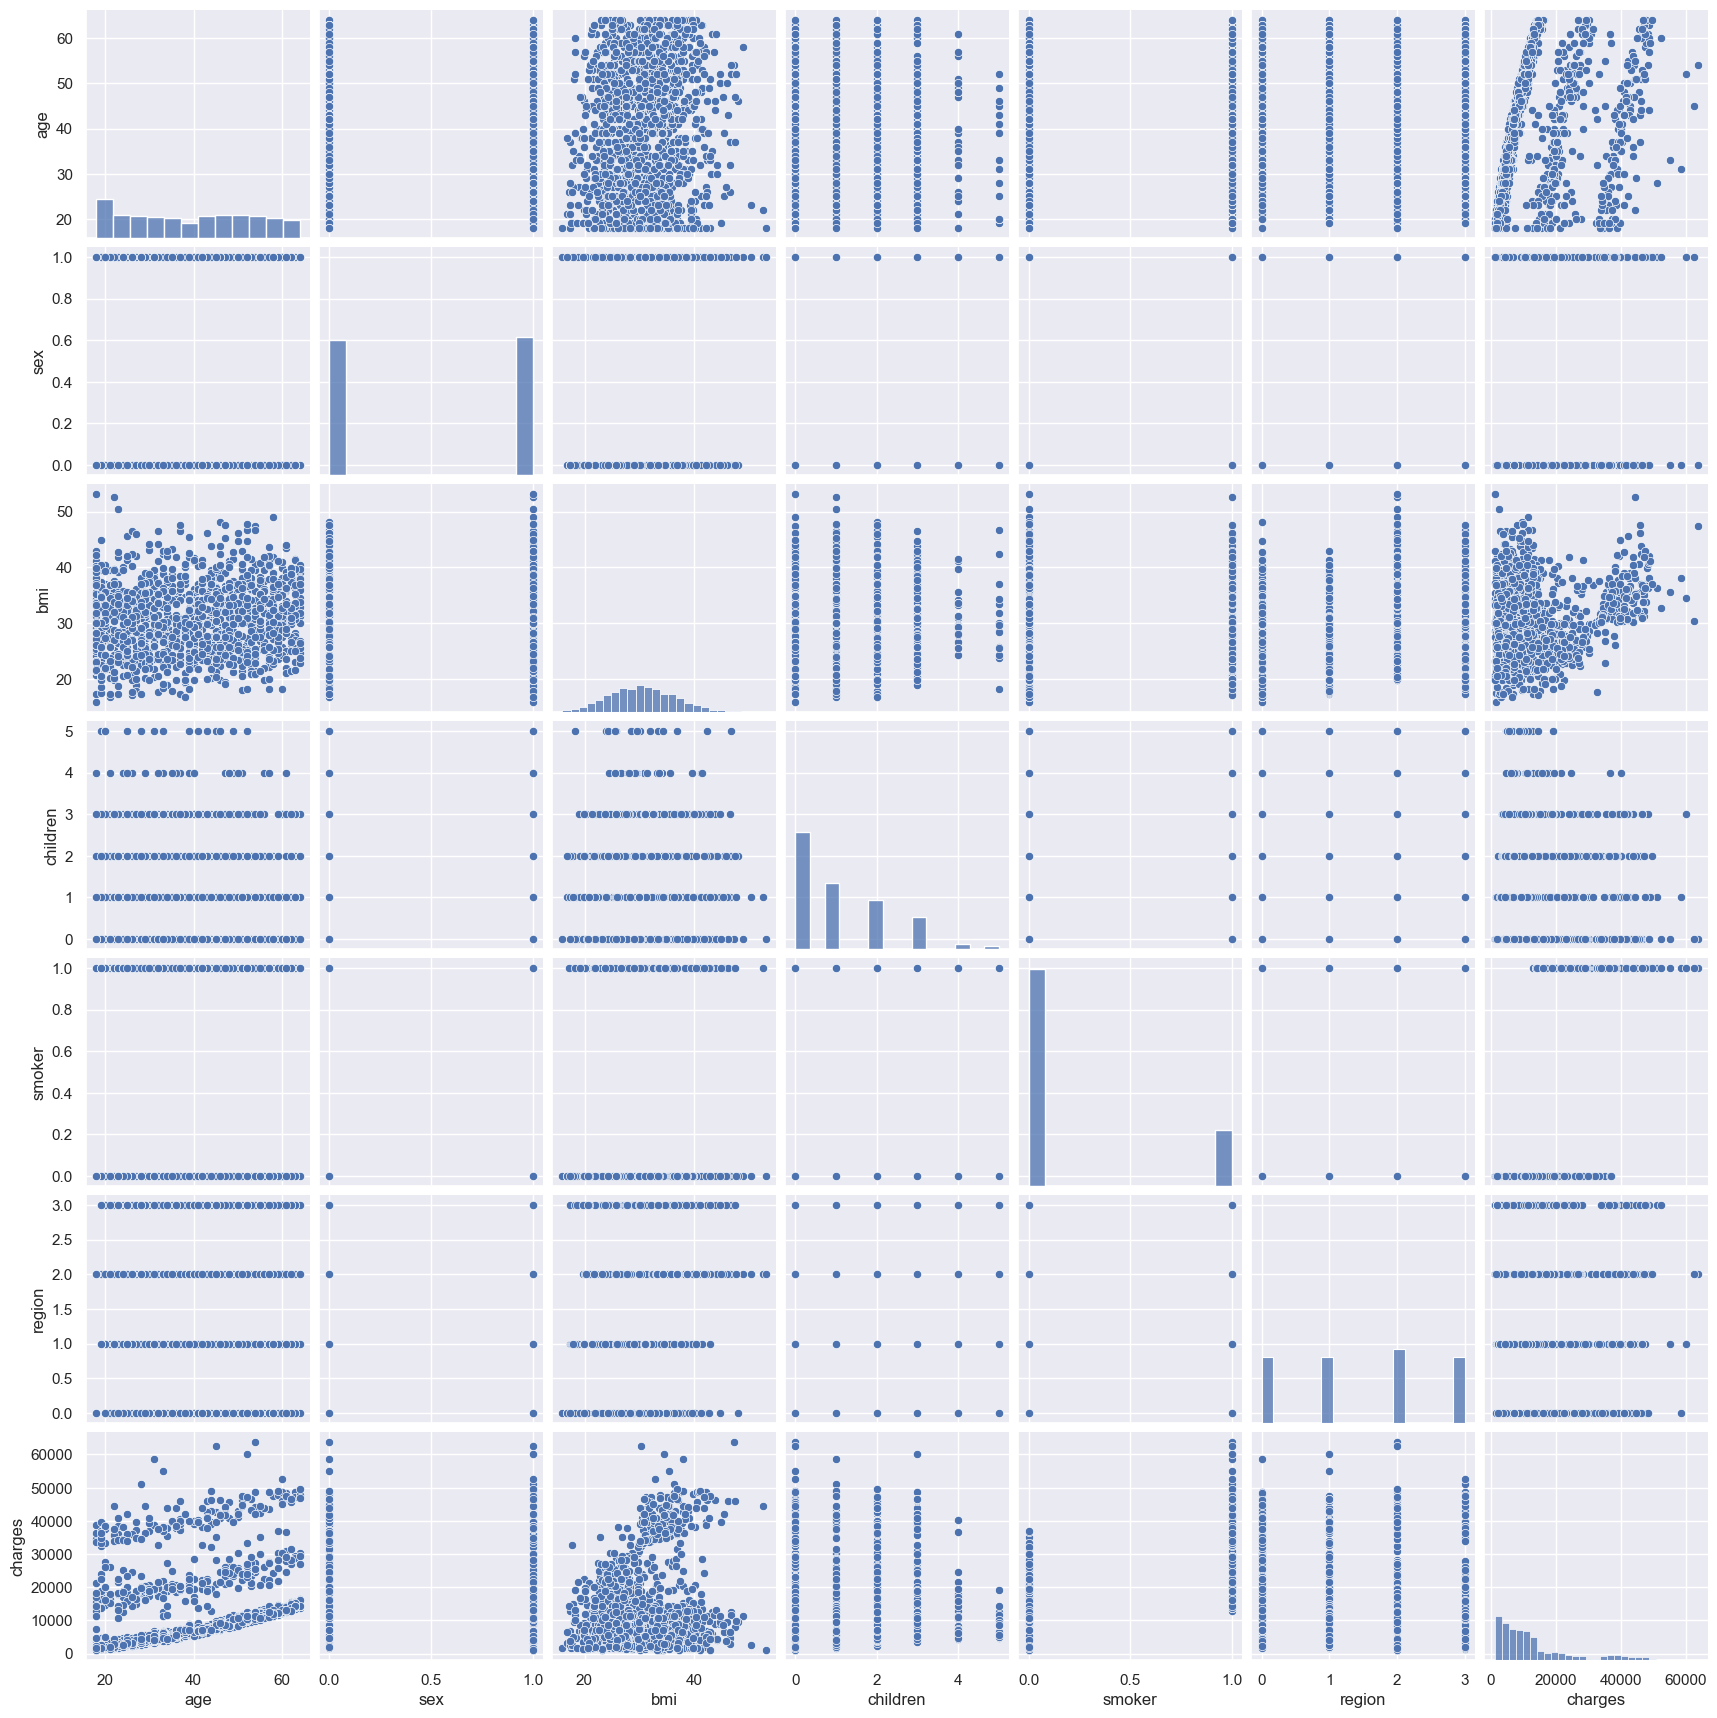

In [27]:
sns.pairplot(df, palette ='hot_r')
plt.show()

### Correlation between target variables & independent variables

In [28]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


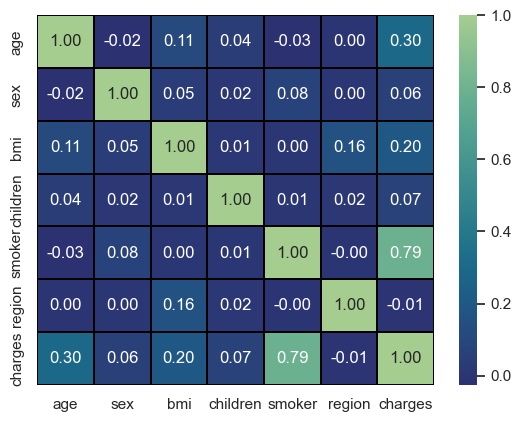

In [29]:
sns.heatmap(df.corr(),annot=True, fmt='0.2f',linewidth=0.2, linecolor='black',cmap="crest_r")
plt.show()

In [30]:
df.corr().charges.sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

### Visualizing the correlation between label & features using bar plot

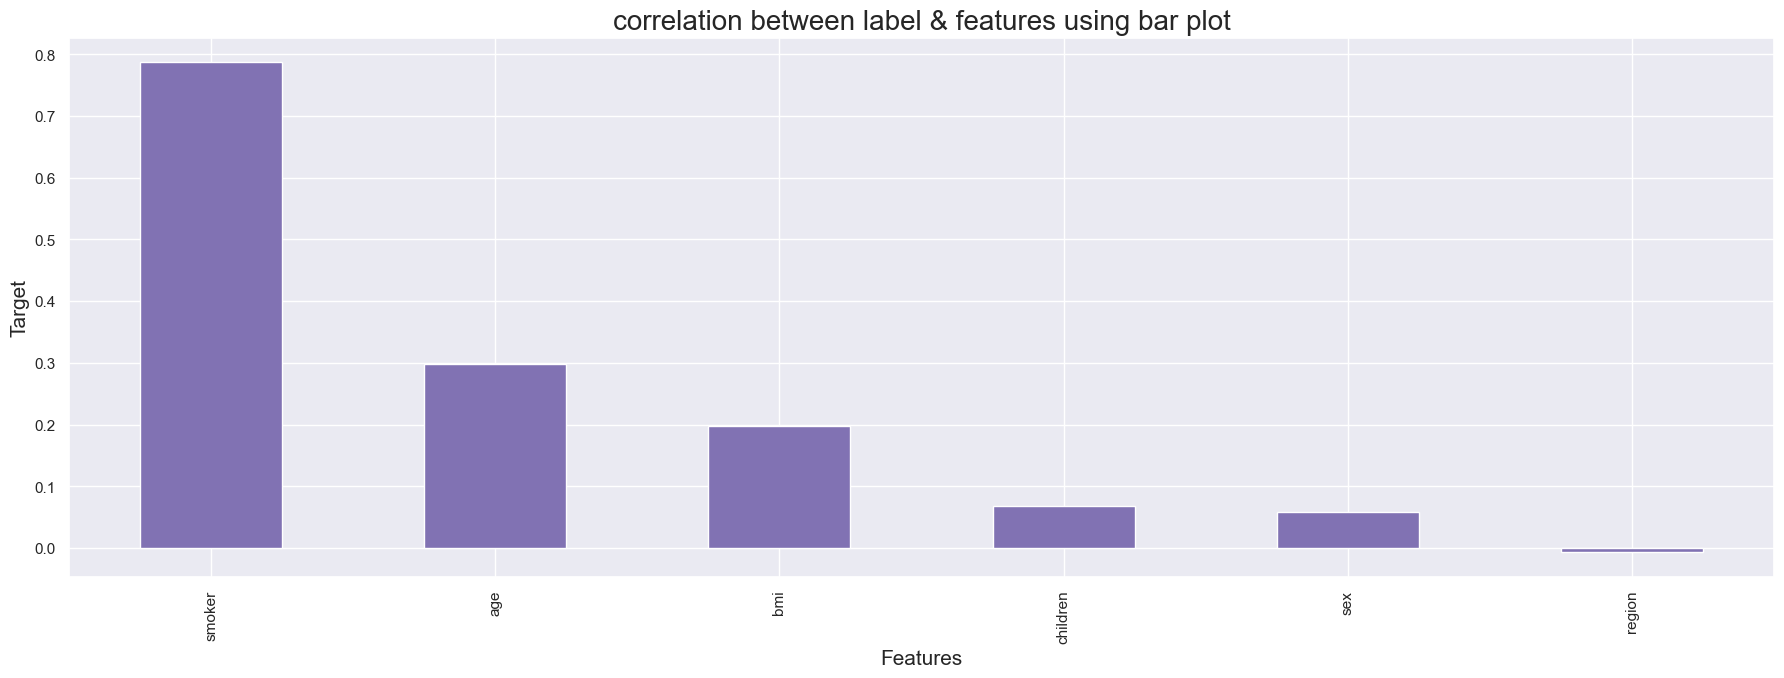

In [31]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('correlation between label & features using bar plot', fontsize=20)
plt.show()

Observation 
> Above barplot we observe that the positive correlationship between the features and the target. Here 'smoker' has positive correlation with our target , gradually it decrease to age than bmi and child, than sex and less correlation with region.

## Separating Features & Labels

In [32]:
#separating independent and target variables into x and y
x=df.drop('charges', axis=1)
y=df['charges']

print("Feature Dimension ", x.shape)
print("Label Dimension", y.shape)

Feature Dimension  (1337, 6)
Label Dimension (1337,)


We got scaled the data using Standard Scalarized method to overcome the issue of biasness.

In [33]:
#finding the best random state

#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [34]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maimum r2 score is ', maxAccu, "Random_State ",maxRS)

Maimum r2 score is  0.809575162037627 Random_State  11


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state=maxRS)

In [36]:
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (1002, 6)
x_test : (335, 6)
y_train : (1002,)
y_test : (335,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [38]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_LR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score:  0.809575162037627
R2 on training Data:  73.14466579170875
Mean Absolute Error:  3758.9463608385954
Mean Squared Error:  25834546.641032387
Root Mean Squared Error:  5082.769583704576


In [39]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_RFR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score:  0.8655193433842637
R2 on training Data:  97.47205054991879
Mean Absolute Error:  2477.243008332263
Mean Squared Error:  18244714.46493968
Root Mean Squared Error:  4271.383202773977


In [40]:
KNN= KNN()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_KNN))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2 Score:  0.1082367965286255
R2 on training Data:  40.762357520748694
Mean Absolute Error:  7828.773399776121
Mean Squared Error:  120983682.1675014
Root Mean Squared Error:  10999.258255332557


In [41]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_GBR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score:  0.9021119726679765
R2 on training Data:  89.6512123733554
Mean Absolute Error:  2231.9987106176177
Mean Squared Error:  13280267.609877199
Root Mean Squared Error:  3644.2101489729157


In [42]:
lasso= Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_lasso))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score:  0.8095755153106238
R2 on training Data:  73.14465723752146
Mean Absolute Error:  3759.3896435497995
Mean Squared Error:  25834498.71321053
Root Mean Squared Error:  5082.764868967532


In [43]:
ridge= Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_ridge))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score:  0.809199065320013
R2 on training Data:  73.14242689385839
Mean Absolute Error:  3772.7274885336383
Mean Squared Error:  25885570.910222847
Root Mean Squared Error:  5087.786445029198


In [44]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_DTR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score:  0.682277843100451
R2 on training Data:  99.87795868900035
Mean Absolute Error:  3076.7275930417914
Mean Squared Error:  43104712.43742222
Root Mean Squared Error:  6565.417917956344


In [45]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_svr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score:  -0.0558537065410194
R2 on training Data:  -10.663314922990551
Mean Absolute Error:  7897.660732821093
Mean Squared Error:  143245503.68335247
Root Mean Squared Error:  11968.521365789196


In [46]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_etr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score:  0.8669753433199286
R2 on training Data:  99.87795868900035
Mean Absolute Error:  2205.964059711791
Mean Squared Error:  18047181.94423611
Root Mean Squared Error:  4248.19749355372


### Cross Validation Score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
score =cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_LR)-score.mean())*100)

[0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ]
0.7471285330088385
Difference between R2 Score & Cross Validation Score:  6.244662902878851


In [49]:
score =cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_RFR)-score.mean())*100)

[0.84964924 0.77686381 0.86738247 0.82792922 0.85067258]
0.8344994636878094
Difference between R2 Score & Cross Validation Score:  3.1019879696454367


In [50]:
score =cross_val_score(KNN,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_KNN)-score.mean())*100)

[0.14668553 0.03658099 0.03172295 0.13957399 0.16316057]
0.10354480529055962
Difference between R2 Score & Cross Validation Score:  0.4691991238065879


In [51]:
score =cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_GBR)-score.mean())*100)

[0.87429611 0.79892653 0.89392726 0.85054133 0.86052967]
0.855644179026623
Difference between R2 Score & Cross Validation Score:  4.6467793641353445


In [52]:
score =cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_lasso)-score.mean())*100)

[0.76125678 0.70843568 0.77718717 0.73366564 0.7551367 ]
0.7471363933595828
Difference between R2 Score & Cross Validation Score:  6.2439121951040955


In [53]:
score =cross_val_score(ridge,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_ridge)-score.mean())*100)

[0.76139416 0.70872916 0.77656529 0.7340199  0.75488218]
0.7471181375337135
Difference between R2 Score & Cross Validation Score:  6.208092778629948


In [54]:
score =cross_val_score(DTR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_DTR)-score.mean())*100)

[0.75446346 0.6636068  0.73841093 0.7123195  0.66399169]
0.7065584770114419
Difference between R2 Score & Cross Validation Score:  -2.428063391099089


In [55]:
score =cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_svr)-score.mean())*100)

[-0.11521827 -0.10975599 -0.08194453 -0.10398097 -0.10781598]
-0.10374314816465749
Difference between R2 Score & Cross Validation Score:  4.788944162363809


In [56]:
score =cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_etr)-score.mean())*100)

[0.83795608 0.74503112 0.84933838 0.81298474 0.84133349]
0.8173287627388511
Difference between R2 Score & Cross Validation Score:  4.9646580581077515


Observation 
> The difference of both R2 & Cross validation score computed on R2 score we get conclude that Gradient Boosting Regressor is our best fitting & best performing model.

#Save the  model

In [63]:
import pickle
filename ="Medical_cost_insurance.pkl"
pickle.dump(GBR, open(filename, 'wb'))

In [64]:
#loading Model
load_model=pickle.load(open('Medical_cost_insurance.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

90.21119726679765


In [65]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Predicted,35631.827377,5997.99314,8205.048588,5952.071914,10005.733549,12387.810493,6132.968415,15481.729105,14951.704759,14353.015517,...,5728.329701,18350.487824,6808.705132,3042.068478,49797.771082,10966.124074,17677.989345,8102.143473,7122.723895,7676.634711
Original,36397.576000,4415.15880,7639.417450,2304.002200,9563.029000,11454.021500,5012.471000,12648.703400,13462.520000,13974.455550,...,12404.879100,19444.265800,5385.337900,1880.070000,46661.442400,3481.868000,13405.390300,7077.189400,3537.703000,5708.867000
